In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

In [2]:
# This is to do on the Titanic dataset after lunch today and for tomorrow's self-directed work. EDA + Logistic Regression on whatever variables you want. E.g. what predicts survived? Build a classification model for Monday to present to the group. JUST LOGISTIC REGRESSION, NOTHING FANCY.
# EDA -> LogReg (Sklearn) -> Review Vaish' Aus Data Set for guidance if you get really stuck -> Score the LogReg model that you've made for the Titanic data. E.g. Recall, precision, etc.
# End goal of this exercise is to have a LogReg in this notebook to share with each other on Monday, be able explain what each line of code is doing.  
# Quote from Vaish: "I don't care if it's perfect as long as it is finished."
# Send notebook through to Vaish on Friday afternoon when finished.

In [3]:
df_test = pd.read_csv('titanic_test.csv')
df_train = pd.read_csv('titanic_train.csv')

df_test.head(10)
# df_train.info() also works for quick overview.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# How many people did survive?
df_train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [7]:
# Training data contains our dependent variable which appears to be 'survived.' 38% survived. 
# I can already see some columns like 'Name' probably aren't relevant to survival chance so I will drop some columns from the training data later on.

In [8]:
df_train.shape 

(891, 12)

In [9]:
df_train.loc[df_train.duplicated()]
# Checking no duplicated rows of data that would affect outputs.
## Output rows are empty, so no duplicates found. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


From the above, we know we have 12 features/variables and 891 passengers with data for us to use.

In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Dictionary ##

Passenger ID = Unique numerical identifier for each passenger.
P-class = What class of room the passenger was staying in. 
Sex = What sex the passenger is, usually 'male' or 'female'.
Age = What age the passenger was, in years.
SibSp = If the passenger had any siblings on board.
Parch = Assumed to be 'Parents' for passengers who were children.
Ticket = Ticket ID for boarding the ship. (No ticket ID = stowaway? or just missing data?)
Fare = The fare each passenger paid when buying a ticket.
Cabin = the room the passenger stayed in during the journey (before it sank!)
Embarked = the port at which the passenger came on-board the Titanic.


In [11]:
Pass_class = df_train['Pclass'].value_counts()
Pass_sex = df_train['Sex'].value_counts()

pass_values = pd.concat([Pass_class, Pass_sex], axis=1, keys=['Passenger Class', 'Passenger Sex']) # Displaying the value counts together in one output via pandas concatenation.
print(pass_values)

        Passenger Class  Passenger Sex
3                 491.0            NaN
1                 216.0            NaN
2                 184.0            NaN
male                NaN          577.0
female              NaN          314.0


In [12]:
df_train['Age'].describe().round()

count    714.0
mean      30.0
std       15.0
min        0.0
25%       20.0
50%       28.0
75%       38.0
max       80.0
Name: Age, dtype: float64

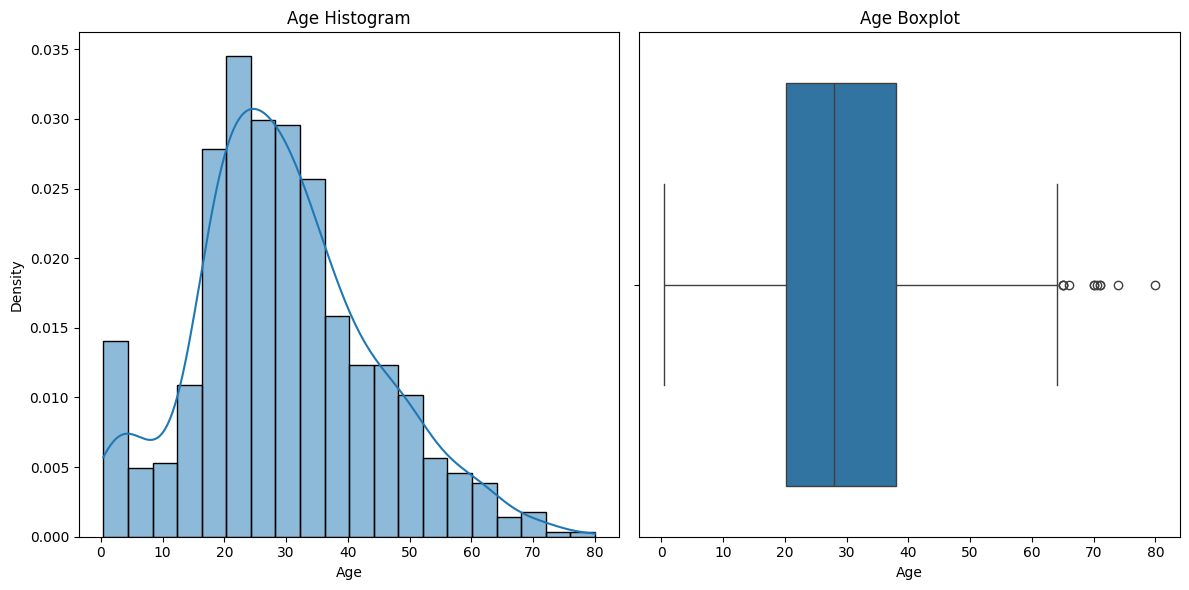

In [13]:
# Age Visualization

fig, ax = plt.subplots(1, 2, figsize=(12,6)) # Setting for 2 graphs and defining them.
ax[0].set(title='Age Histogram', xlabel='Age', ylabel='Density')
ax[1].set(title='Age Boxplot', xlabel='Age')

sns.boxplot(data=df_train, x='Age', ax=ax[1])
sns.histplot(df_train['Age'], kde=True, ax=ax[0], stat='density')
plt.tight_layout() # Making a boxplot and histogram next to each other so I can see both.

In [14]:
# Age is positive skewed so median imputation for later. Since I'm checking nulls out, might as well do Cabin next.
# 891 passengers but only 714 ages counted, impute median later.

In [15]:
df_train['Cabin'].value_counts() # This refers to which room the passenger stayed in on the ship, so I'm having a look. It is probably related to Pclass so I will keep it in the dataframe.

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
df_train['Cabin'].nunique()

147

In [17]:
# What about tickets? 
df_train['Ticket'].describe() 


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [18]:
# Lots of unique tickets for an Object variable, not sure how useful it is for predicting survival so might drop from dataframe. I'll do name here as well now. 
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True) 

# Check ticket vs. other inputs as part of EDA.

# ['Ticket', 'Name'] also works instead of writing df_train.drop() twice.
df_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


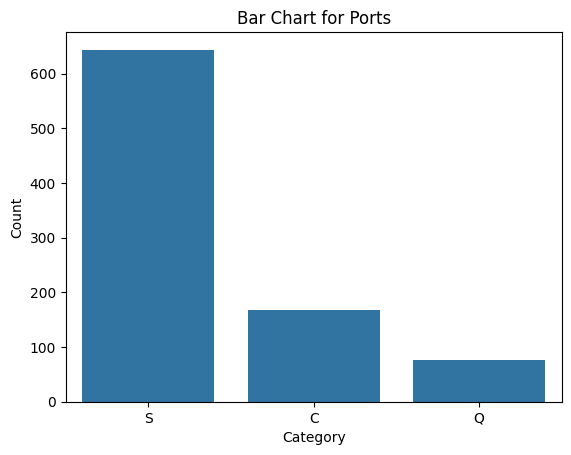

In [19]:
# Let's look at the Embarked next. Who boarded where?

df_train['Embarked'].value_counts()

# S = Southampton (England), C = Cherbourg (France), Q = Queenstown (Ireland). Next destination was New York but Titanic sank en route. 

sns.countplot(x='Embarked', data=df_train)
plt.title('Bar Chart for Ports')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [20]:
df_train.groupby('Survived')[['Embarked']].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [21]:
# Looking at SibSp and Parch to see how similar or different they are.

Pass_sibsp = df_train['SibSp'].describe()
Pass_parch = df_train['Parch'].describe()

pass_values_2 = pd.concat([Pass_sibsp, Pass_parch], axis=1, keys=['Passenger Siblings', 'Passenger Parents']) # Displaying the value counts together in one output.
print(pass_values_2)

       Passenger Siblings  Passenger Parents
count          891.000000         891.000000
mean             0.523008           0.381594
std              1.102743           0.806057
min              0.000000           0.000000
25%              0.000000           0.000000
50%              0.000000           0.000000
75%              1.000000           0.000000
max              8.000000           6.000000


In [22]:
# Someone on Stack Overflow suggested combining Parch and SibSp into a new feature that describes whether the passenger in question traveled alone or had someone with them. So I decided to try this idea out. I don't want to say how long this took...

df_train['TravelSolo'] = (df_train['SibSp'] == 0) & (df_train['Parch'] == 0) # put .astype('int8') at the end to set TravelSolo as a binary 0-1 automatically, removes the need for OHE. 

# The above code creates a new 'TravelSolo' column in the dataframe by checking if SibSp or Parch are giving a zero value, then displays this in the new column as 'true' if they were alone, or 'false' if they had a sibling and/or a parent with them.

# Great it worked. Since I've done this, I'll drop the Parch and SibSp columns now.

## Vaish advice: df_train[]

In [23]:
df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'TravelSolo'],
      dtype='object')

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TravelSolo
0,1,0,3,male,22.0,7.2500,NaN,S,False
1,2,1,1,female,38.0,71.2833,C85,C,False
2,3,1,3,female,26.0,7.9250,NaN,S,True
3,4,1,1,female,35.0,53.1000,C123,S,False
4,5,0,3,male,35.0,8.0500,NaN,S,True


In [25]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin          687
Embarked         2
TravelSolo       0
dtype: int64

Imputation Methods for sorting out nulls:

Mean imputation: Suitable for approximately normally distributed data.
Median imputation: better for skewed datasets as more robust to skew and outliers than mean imputation. 
Mode imputation: better for categorical or non-numerical data.

In [26]:
df_train['Age'].fillna(df_train['Age'].median(skipna=True), inplace=True) # imputing Age nulls with median value due to skewness.

df_train['Cabin'].fillna(df_train['Cabin'].mode().iloc[0], inplace=True) # Imputing Cabin with first mode value. No skipna here because it causes error.

df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TravelSolo
0,1,0,3,male,22.0,7.2500,B96 B98,S,False
1,2,1,1,female,38.0,71.2833,C85,C,False
2,3,1,3,female,26.0,7.9250,B96 B98,S,True
3,4,1,1,female,35.0,53.1000,C123,S,False
4,5,0,3,male,35.0,8.0500,B96 B98,S,True
5,6,0,3,male,28.0,8.4583,B96 B98,Q,True
6,7,0,1,male,54.0,51.8625,E46,S,True
7,8,0,3,male,2.0,21.0750,B96 B98,S,False
8,9,1,3,female,27.0,11.1333,B96 B98,S,False
9,10,1,2,female,14.0,30.0708,B96 B98,C,False


In [27]:
df_train.isnull().sum()
# Nulls filled.

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
TravelSolo     0
dtype: int64

In [28]:
df_train['Cabin'].value_counts()

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

Looks like my mode imputation has thrown most passengers into cabin B96 B98 and my advice from the Internet is to drop this variable from the dataset because of how mode imputation has worked in this case. 

However, I know from history knowledge that the wealthier passengers were housed in cabins that were on higher decks, meaning they had quicker access to the top deck of the ship where all the emergency equipment was, whereas poorer passengers were housed deeper in the ship where flooding was at its worst and many drowned in their rooms. So since cabin probably is a predictor of survival chance based on that, I thought about extracting the deck label and creating a new column with this but ran out of time before I could figure the code out to do it. So I will drop 'Cabin' instead but I am aware of the potential impact of this on my model. 

In [29]:
# I will also drop ID at this point because I feel I am finished with EDA and ID won't meaningfully impact survival chance.

df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Cabin', axis=1, inplace=True) 

In [30]:
df_train.dtypes # Getting ready to do OHE on object variables. 

Survived        int64
Pclass          int64
Sex            object
Age           float64
Fare          float64
Embarked       object
TravelSolo       bool
dtype: object

Explaining the OHE code below:

The below code box is doing one-hot encoding on each column of the dataset that was an 'object' datatype (categorical variable), converting each entry to an integer-8 value (int8). I chose int8 for memory optimization because the numbers assigned were going to be small in scale (int8 range is -128 to 127 and uses 1 byte of memory per integer). 

I dropped the first level to try and avoid problems with multicollinearity which affects standard error (precision of a statistic) and makes it more difficult to judge the impact of each feature on our dependent variable. However I later noted that this stopped OHE from applying to 'Cherbourg' in 'Embarked' so I changed it to 'False.'

In [31]:
categorical_columns = ['Sex','Embarked', 'TravelSolo'] # Didn't need to OHE TravelSolo, can do .astype('int8') as noted earlier. 
df_encode = pd.get_dummies(data = df_train, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =False,
              dtype='int8')

# Can drop_first and model should work alright, but when 3+ should keep it. 
# Since most passengers were embarked at Southampton, might be able to drop the other Ports. [ Jordan's idea ]

df_encode

,Survived,Pclass,Age,Fare,OHE_female,OHE_male,OHE_C,OHE_Q,OHE_S,OHE_False,OHE_True
0,0,3,22.0,7.2500,0,1,0,0,1,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,0,1
3,1,1,35.0,53.1000,1,0,0,0,1,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,0,1
887,1,1,19.0,30.0000,1,0,0,0,1,0,1
888,0,3,28.0,23.4500,1,0,0,0,1,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,0,1


In [32]:
df_encode.isnull().sum() # Double checking that it went through.

Survived      0
Pclass        0
Age           0
Fare          0
OHE_female    0
OHE_male      0
OHE_C         0
OHE_Q         0
OHE_S         0
OHE_False     0
OHE_True      0
dtype: int64

In [33]:
df=df_train
print('Columns in original data frame:\n',df_train.columns.values)
print('\nNumber of rows and columns in the dataset:',df_train.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
# The above code is looking to see how OHE has changed my original dataframe in terms of its dimensions. 

Columns in original data frame:
 ['Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'TravelSolo']

Number of rows and columns in the dataset: (891, 7)

Columns in data frame after encoding dummy variable:
 ['Survived' 'Pclass' 'Age' 'Fare' 'OHE_female' 'OHE_male' 'OHE_C' 'OHE_Q'
 'OHE_S' 'OHE_False' 'OHE_True']

Number of rows and columns in the dataset: (891, 11)


OHE_male = Sex of Passenger (0 = female, 1 = male)
OHE_female = Sex of Passenger (0 = male, 1 = female)
OHE_Q = Embarked at Queensland (0 for no, 1 for yes)
OHE_S = Embarked at Southampton (0 for no, 1 for yes)
OHE_C = Embarked at Cherbourg (0 for no, 1 for yes)
OHE_True = Traveller was alone on the journey (0 for no, 1 for yes)
OHE_False = Traveller was with someone on the journey (0 for no, 1 for yes)

I think having two OHE columns for TravelSolo and Sex is unnecessary so I'll drop one?

In [34]:
df_encode.drop(['OHE_False'], axis=1, inplace=True)
df_encode.drop(['OHE_female'], axis=1, inplace=True)

# Could we rename OHE_True as OHE_Alone?

In [35]:
# Do I need to do binary encoding on 'Survived'? If it's already a binary value (0 or 1) then I assume not?

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [36]:
# Time to start the regression training.

from sklearn.model_selection import train_test_split

X = df_encode.drop('Survived', axis=1) # feature matrix/independent variables.
y = df_encode['Survived'] # Target/dependent variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# The above code prepares data for *supervised* machine learning by splitting it into features (X) and the target variable (y).
# Test size was set at 0.3 (30%) as Google advised this test size for smaller datasets.
# It then splits the data into training and testing sets to evaluate the model's performance.
# The testing set is used to assess how well the model generalizes to unseen data, basically telling us how accurate our regression model is.
# Random_state=23 does not affect anything to my knowledge, it just helps to make the output reproducible by others.

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='liblinear', random_state=23) # Liblinear is a solver algorithm for small datasets
LogReg.fit(X_train, y_train) # This line trains the logreg model on the training data.

# Predictions

y_pred_test = LogReg.predict(X_test) # The output of the model.

print(y_pred_test) 

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 0 1]


It's an array of binary but Google tells me this is to be expected for logistic regression.
This is because a logistic regression model predicts the probability that an instance belongs to the positive class (class 1), and then a threshold is applied to determine the predicted class.

Google - "The default threshold in scikit-learn for binary classification is 0.5. If the predicted probability is greater than or equal to 0.5, the instance is classified as class 1; otherwise, it is classified as class 0."

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)
# More scores like this to come later on.

0.7835820895522388

The above value tells me that my logistic regression model correctly predicts 78.35% of 'Survived' from the input. This means that 21.65% of these predictions are not correct, suggesting other factors that are not within the inputs are influencing survival. It might be some of the inputs I dropped earlier like 'Name' or 'Cabin' or it could be something else that was never included in the original dataset, or simply random chance. 

In [38]:
# Finding out P-value for LogReg..
import statsmodels.api as sm

X_train_with_intercept = sm.add_constant(X_train) # adds an intercept to the feature matrix to account for baseline probability. Baseline probability represents the probability of the dependent variable being in a particular category when all independent variables are set to a zero.
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit() # This line fits the logistic regression model to the training data.

# The above codes tell statsmodel what our logistic regression model is so it knows what to do the P-value calc on. 
# sm.Logit is the logistic regression version of sm.OLS

print(result.summary())
# The below output changes 'time' and 'date' every time I have to reload this notebook. Original regression was completed on the 5th of January at 2pm.

Optimization terminated successfully.
         Current function value: 0.441403
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.3427
Time:                        09:26:13   Log-Likelihood:                -274.99
converged:                       True   LL-Null:                       -418.38
Covariance Type:            nonrobust   LLR p-value:                 2.689e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3113   6.64e+06   6.49e-07      1.000    -1.3e+07     1.3e+07
Pclass        -1.3662      0

Converged: True = optimization algorithm has reached a stable solution = model parameters have been adjusted to reduce difference between predicted and actual outcomes.

Interpretations focused on model performance rather than individual effect sizes for features.

# P-value interpretation #

Pclass: p-value < 0.001 (highly significant)
Age: p-value < 0.001 (highly significant)
Fare: p-value = 0.031 (significant)
OHE_male: p-value < 0.001 (highly significant)
OHE_C: p-value = 1.000 (not significant)
OHE_Q: p-value = 1.000 (not significant)
OHE_S: p-value = 1.000 (not significant)
OHE_True: p-value = 0.522 (not significant)

Statistical significance = the probability of observing the estimated relationship between each predictor and 'Survived' by chance instead of direct effect. 
The lower the P-value, the more likely it is that this predictor contributes positively to the model's ability to predict whether a Passenger survived or not.

# Other Stats Interpretation #

Pseudo R^2 = 0.3427 = 34.27% of the variability in 'Survived' is explained by this LogReg model. 

LLR p-value = 2.689e-57 = very high statistical significance of the model (anything with e-57 after it is a very small number!). 
Note: if your model is very significant it will get tiny values like the above because it's not mathematically possible for p = 0.

Log-Likelihood = -274.99 = not meaningful without another classification model here to compare it to as this allows you to compare different regression models to see which one fits your observed data the best. 

In [39]:
#Precision Score for the model 
# Remimder: Precision = True Positives / (True Positives + False Positives)

# y_test = original data, y_pred_test = LogReg prediction data.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_test)

# Below output shows that 71.26% of my model's positive predictions were actually positive.

0.7126436781609196

In [40]:
# Recall score.
# Reminder: Recall (Sensitivity) = True Positives / (True Positives + False Negatives)

from sklearn.metrics import recall_score
recall_score(y_test, y_pred_test)

# Below output shows that the model correctly identified and classified 65.26% of the actual positive instances out of all the positive instances present in the dataset. 
# A result of 0.6526 suggests the model performs somewhat well but far from ideal result of 100%.

0.6526315789473685

In [49]:
from sklearn.metrics import f1_score

print(f"Accuracy Score =", accuracy_score(y_test, y_pred_test))
print(f"Recall Score =", recall_score(y_test, y_pred_test))
print(f"Precision Score =", precision_score(y_test, y_pred_test))
print(f"F1 Score =", f1_score(y_test, y_pred_test)) 

# f1 = 0.6813 = moderate balance between precision and recall, closer to 1 is better and closer to 0 suggests imbalance.
# It suggests that the model is reasonably effective in correctly identifying positive instances while minimizing false positives and false negatives.
# Balance between recall and precision is important because an increase in one usually causes a decrease in the other, affecting your performance metric outputs accordingly. 

Accuracy Score = 0.7835820895522388
Recall Score = 0.6526315789473685
Precision Score = 0.7126436781609196
F1 Score = 0.6813186813186813


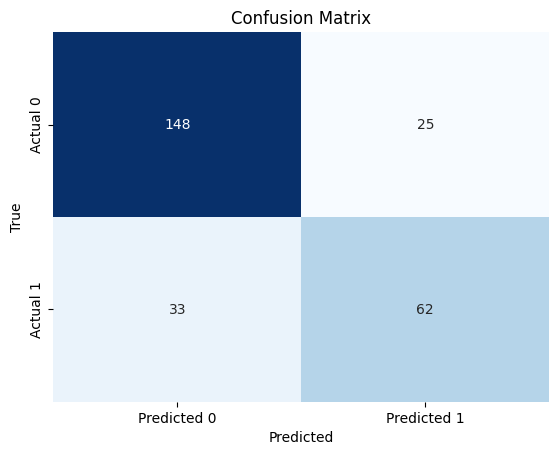

In [41]:
# Confusion Matrix 
# Confusion Matrix = evaluates performance of a classification algorithm by showing the counts of true positive, true negative, false positive, 
# and false negative predictions made by the model on a dataset.

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test) # Comparing df_train data with model's prediction data

# I did print(conf_matrix) and struggled to make sense of it so I had a go at plotting it in Seaborn instead.

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels={'Predicted 0', 'Predicted 1'},
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [42]:
print(conf_matrix)

[[148  25]
 [ 33  62]]


# Confusion Matrix Interpretation #

[[True Negative (TN)   False Positive (FP)]
 [False Negative (FN)  True Positive (TP)]]

True Positive: cases where the model predicted '1' (positive) and the actual class is also '1' (positive) = 62

False Positive: cases where the model predicted '1' (positive) but the actual class is '0' (negative) = 25

True Negative: cases where the model predicted '0' (negative) and the actual class is also '0' (negative) = 148 

False Negative: cases where the model predicted '0' (negative) but the actual class is '1' (positive) = 33

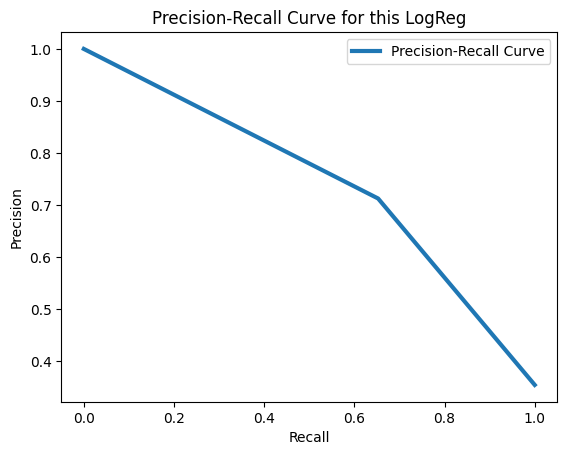

In [43]:
# Precision Curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test) 

# Thresholds = probability setting to determine predicted class label. Useful for optimizing for Precision vs Recall. 
# Run workbook when not presenting and look at print(thresholds)

# Plotting the precision-recall curve using matplotlib, line width = 3 for readability on a large screen
plt.plot(recall, precision, label='Precision-Recall Curve', lw=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Rule of thumb is that the closer your PR curve gets to the top right corner of the graph, the better.
# Line plotted corresponds to earlier Precision and Recall scores where the two lines meet at the curve. 

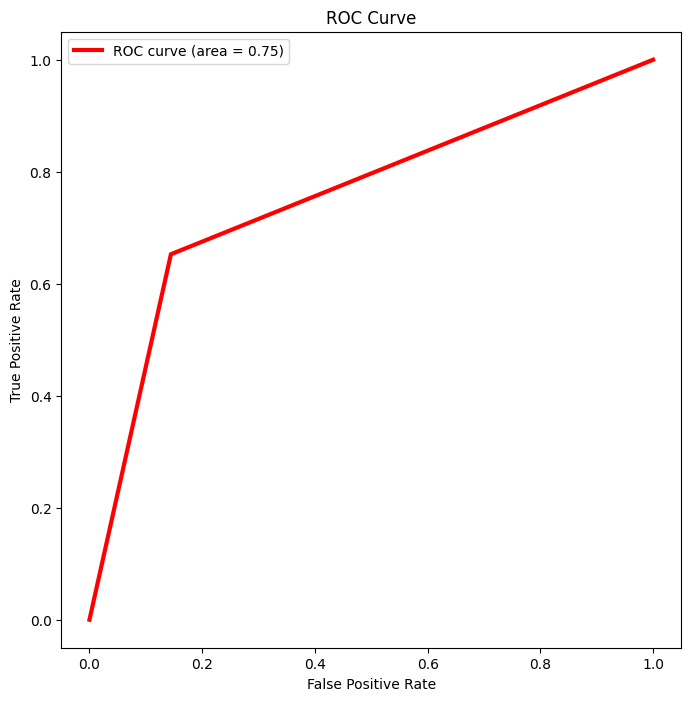

In [44]:
# Receiver Operating Characteristic (ROC) Curve
# Method for assessing performance of classifiers like LogReg models. Represents true positives vs. false positives.
# A good classifier should have a curve that is closer to the top-left corner.
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test) # false positive rate and true positive rate plotted onto roc_curve.
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve in matplotlib

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=3, label='ROC curve (area = {:.2f})'.format(roc_auc))
# Plots the ROC curve with false positive rate (fpr) on the x-axis and true positive rate (tpr) on the y-axis. 
# The line is red, has a line width of 3, and includes the area as a 2.digit float under the curve (AUC) value in the label.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# using test_proba to check probability instead of binary will increase the ROC curve area. 

# Interpreting Area Under ROC Curve (AUC-ROC) #
AUC = 0.75 according to the graph
AUC scale = 0 - 1

AUC = 0.75 = "moderate discrimination power" = my LogReg model has some ability to distinguish between positive and negative instances but it's far from ideal (the closer you get to 1, the better) 

On the ROC curve graph, the closer your curve gets to the top-left corner, the higher your AUC will be. Higher AUC-ROC = higher sensitivity 




# What is 'Recursive Feature Elimination'?

Recursive Feature Elimination (RFE) is a feature selection technique that works by recursively removing the least important features until the desired number of features is reached. There are 5 steps:

1 - Build a Model: Initially, the model is trained on all available features.

2 - Feature Importance Ranking: After the model is trained, it assigns importance scores to each feature. Features with the lowest importance scores are considered the least important.

3 - Remove Least Important Feature(s): The least important feature(s) are removed from the dataset.

4 - Repeat: Steps 1-3 are repeated on the reduced dataset until the desired number of features is reached.

5 - Performance Evaluation: The final set of features is used to train the model, and its performance is evaluated.

Machine learning algorithms such as Support Vector Machines (SVM) or Random Forest as well as logistic regression can be used with RFE due to their ability to provide feature importance scores.

RFE is beneficial for:

Reduce Overfitting: Removing irrelevant features can reduce overfitting, especially when dealing with high-dimensional data.

Computational Efficiency: By focusing on a subset of features, it can reduce computational costs.

Improved Model Performance: In some cases, removing irrelevant features can lead to a model that generalizes better to new, unseen data.

# What is cross validation? #

Cross-validation is a statistical technique to assess the performance and generalizability of a predictive model by evaluating how well a model will perform on an independent dataset that was not used during the model training process, to detect potential issues like overfitting or poor generalization.

Here's a basic overview of how cross-validation works:

Data Splitting: The original dataset is divided into two subsets: a training set and a test set.

Model Training: The model is trained on the training set.

Model Evaluation: The performance of the model is evaluated on the validation set using metrics like accuracy, precision, recall, etc.

Repeat Steps 1-3: Steps 1-3 are repeated multiple times, each time with a different random split of the data. This results in multiple performance metrics.

Aggregate Results: The performance metrics from each iteration are averaged or otherwise aggregated to obtain a more robust estimate of the model's performance.

Common types of cross-validation include:

K-Fold Cross-Validation: The dataset is divided into K equally sized folds. The model is trained on K-1 folds and validated on the remaining fold. This process is repeated K times, with each fold serving as the validation set exactly once.

Stratified K-Fold Cross-Validation: Similar to K-Fold, but it ensures that each fold has a similar distribution of the target variable as the original dataset. This is particularly useful for imbalanced datasets.

Leave-One-Out Cross-Validation (LOOCV): Each data point is used as a validation set, while the rest of the data is used for training. This process is repeated for each data point.

# What is a Grid Search algorithm? #
Grid Search is a hyperparameter tuning technique for finding the optimal combination of hyperparameter values for a given model. 

Hyperparameters are external configuration settings for a model that need to be set before training, eg. the learning rate in a gradient boosting algorithm or the test size in a regression.

The Grid Search algorithm works by exhaustively searching through a manually specified subset of hyperparameter values. For each combination, the model is trained and evaluated using a cross-validation strategy, and the performance metrics are recorded.

Here's a step-by-step breakdown of the Grid Search process:

1- Specify a set of hyperparameter values or a range for each hyperparameter you want to tune. For example, you might define a grid for the learning rate and regularization parameter.

2- Generate all possible combinations of hyperparameter values from the specified grid.

3- For each combination, train the model using the training data and evaluate its performance using cross-validation.

4- Identify the combination of hyperparameters that resulted in the best performance according to the chosen metric.

5- Train the final model using the best hyperparameter values on the entire dataset.

Grid Search helps automate the process of hyperparameter tuning and ensures that you explore a reasonable set of hyperparameter combinations. However it can be taxing on your computer and use a lot of memory and processing power. 

## Hyperparameters ##

Some hyperparameters of a logistic regression:

# Penalty:
Specifies the type of regularization to be applied.
Options: 'l1' (L1 regularization), 'l2' (L2 regularization), 'elasticnet' (both L1 and L2 regularization), or 'none' (no regularization).

# C:
Inverse of regularization strength.
Smaller values of C result in stronger regularization.
Positive float; smaller values indicate stronger regularization.

# fit_intercept:
Specifies whether to calculate the intercept for the model.
If False, the model is assumed to have no intercept.

# solver:
Specifies the algorithm to use for optimization.
Options: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'.
The choice of solver can impact the speed and efficiency of the optimization process.

# max_iter:

Maximum number of iterations for the solver to converge.
Default value is usually set, but it can be adjusted based on the convergence behavior.

# multi_class:
Determines the strategy to use for multiclass classification.
Options: 'ovr' (one-vs-rest) or 'multinomial' (softmax regression).
'ovr' is suitable for binary and multiclass classification, while 'multinomial' is suitable for multiclass problems.

# class_weight:
Specifies weights associated with classes. This can be used to handle class imbalance.
Default is None, but you can provide a dictionary or 'balanced' option to automatically adjust weights.

# random_state:
Seed for random number generation to ensure reproducibility.

When tweaking hyperparameters, what do you want to optimise your model for? Accuracy or recall? Precision or F1? This is something to think about when doing cross-validation. 


Different Sklearn logistic regression solvers include:

# Liblinear (default):
solver='liblinear'
Suitable for small to medium-sized datasets.
Performs well when the number of features is much greater than the number of samples.
Uses a coordinate descent method to minimize the logistic regression objective.

# Newton-CG:
solver='newton-cg'
Uses the Newton Conjugate Gradient optimization method.
Suitable for small datasets with fewer features.
May be computationally expensive for large datasets.

# LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):
solver='lbfgs'
Uses a limited-memory quasi-Newton optimization method.
Suitable for small to medium-sized datasets.
It is often a good choice for high-dimensional datasets.

# Sag (Stochastic Average Gradient):
solver='sag'
Uses a stochastic gradient descent optimization.
Efficient for large datasets.
Particularly useful when the number of samples is significantly larger than the number of features.

# Saga (SAG with L1 regularization):
solver='saga'
An extension of the SAG solver that includes support for L1 regularization.
Suitable for large datasets with a high degree of sparsity in the data.
Handles both L1 and L2 regularization.